# Regression
(by Tevfik Aytekin)

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
import math

# IMPORTANT: You need to download the following file to your computer from here:
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train = pd.read_csv("../datasets/house_prices/train.csv")

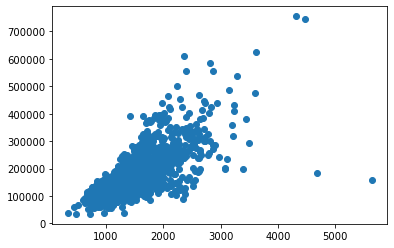

In [95]:
plt.scatter(train.loc[:,"GrLivArea"], train.loc[:,"SalePrice"])

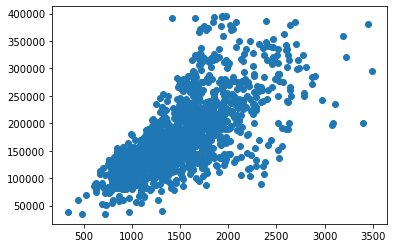

In [96]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
plt.scatter(train2.loc[:,"GrLivArea"], train2.loc[:,"SalePrice"])

(257, 1) (257,)
(29, 1) (29,)


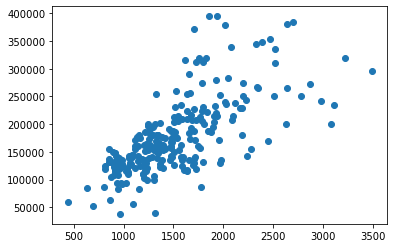

In [97]:
# Take a small sample of the data in order to work with nicer diagrams.
# Make a test / train split

train2 = train2.sample(frac=0.2)
X = train2[['GrLivArea']]
y = train2['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

In [102]:
# fit a linear model
model = linear_model.LinearRegression()
model = model.fit(X_train, y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

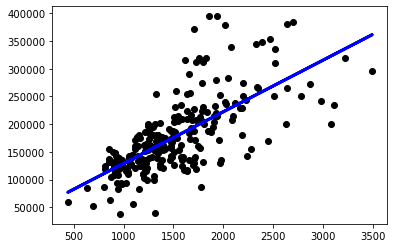

In [103]:
#Plot regression line on training data
plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)


In [104]:
# Show the intercept and the coefficient of the model (which is a line)
print (model.intercept_)
print (model.coef_)

36015.98591356748
[93.09]


In [105]:
def predict(GrLivArea):
    return model.intercept_ + model.coef_*GrLivArea

In [106]:
predict(1000)

array([129105.64])

#### Can we interpret the above coefficient as increase in price per square feet?

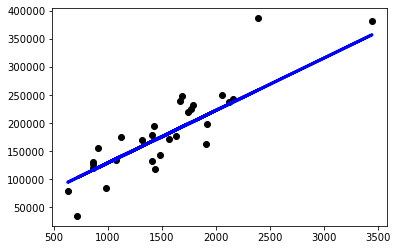

In [107]:
#Plot regression line on test data
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, test_predictions, color='blue', linewidth=3)

In [108]:
# training and test set mean absolute error (MAE)
print("Training MAE:", mean_absolute_error(y_train, train_predictions))
# or
print(np.mean(np.abs(y_train - train_predictions)))

print("Test MAE:", mean_absolute_error(y_test, test_predictions))


Training MAE: 33804.389418026476
33804.38941802647
Test MAE: 29016.609040168845


In [109]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))

Test MAPE: 21.61774326584471


In [110]:
print("r-squared:", model.score(X_test, y_test))

r-squared: 0.7463461221290411


## The Coefficient of Determination, r-squared ($r^2$)

$r^2$, is the percentage of the dependent variable variation that a model explains. What does this mean? Baseline model predicts always the mean value (a horizontal line). We can find the SSE of the baseline model (call it MSSE). Find the SSE of the regression line (call it RSSE). 

$$r^2 = 1 - \frac{RSSE}{MSSE} = \frac{(MSSE - RSSE)}{MSSE}$$ 

$r^2$ compares the performance of the model with respect to baseline. If it is 0 it means the model performance is as bad as the baseline, if it is 1 it means that the model performance is perfect. 

What is the range of values can $r^2$ take? Can it be a negative value?

More information is [here](https://onlinecourses.science.psu.edu/stat501/node/255/)

$r$ in $r^2$ refers to Pearson's correlation coefficient. Relation between $r$ and $r^2$ is [here](http://www.win-vector.com/blog/2011/11/correlation-and-r-squared/)


In [111]:
# baseline - predict always the mean SalePrice value

mean_sales_price = y_train.mean()
mean_array = np.ones(y_test.size)*mean_sales_price
print("Baseline (mean) MAE:", mean_absolute_error(y_test, mean_array))
print("Baseline (mean) MAPE:", mean_absolute_percentage_error(y_test, mean_array))


Baseline (mean) MAE: 56708.13940695022
Baseline (mean) MAPE: 42.889312932923815


In [112]:
# Scores according to Kaggle challenge metric
from sklearn.metrics import mean_squared_log_error


def kaggle_score2(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_error(np.log(y_true), np.log(y_pred)));

print("Test Kaggle-score:", kaggle_score(y_test, test_predictions))
print("Baseline (mean) Kaggle-score:", kaggle_score(y_test,mean_array))


Test Kaggle-score: 0.2734439106274093
Baseline (mean) Kaggle-score: 0.4708398106556152


In [113]:
# Prediction with two input variables

X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']

X.head(5)

,GrLivArea,BedroomAbvGr
0,1710,3
1,1262,3
2,1786,3
3,1717,3
4,2198,4


In [114]:
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['GrLivArea','Bedroom'], model.coef_)).T
print(combined)

Test MAE: 35401.10614794936
Test Kaggle-Score: 0.2638344601741387
Test MAPE: 21.866465509071343
Intercept: 64374.315521458004
[['GrLivArea' '126.65907158282846']
 ['Bedroom' '-26354.280966328737']]


### The coefficient of Bedroom is negative! Does increase in the number of bedrooms negatively effect house price?

Interpretation of linear models are relatively easy (of course one should be careful about the assumptions of the model). For numerical features, changing the numerical feature by one unit changes the prediction by an amount of the size of its coefficient **when all other feature values are fixed**. So, it makes sense for the increase in the number of bedrooms to have a negative effect on sales price when the area is fixed. 

If you only use the BedroomAbvGr feature for prediction things will change.

In [115]:
# Prediction with only Bedroom

X = train.loc[:,['BedroomAbvGr']]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((['Bedroom'], model.coef_)).T
print(combined)

Test MAE: 55661.70768239946
Test Kaggle-Score: 0.3958832516930432
Test MAPE: 34.96572551330564
Intercept: 136461.00072796197
[['Bedroom' '15547.264936955748']]


In [116]:
# Run linear regression with top correlated 10 attributes with SalePrice
cors = train.corr(); 
top10 = np.abs(cors.loc[:, "SalePrice"]).sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)

X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((top10, model.coef_)).T
print(combined)


Test MAE: 24052.17982044485
Test Kaggle-Score: 0.25348601441725427
Test MAPE: 15.115441710969451
Intercept: -1180831.302332761
[['OverallQual' '19937.313118591977']
 ['GrLivArea' '50.74023384564229']
 ['GarageCars' '12015.85734878451']
 ['GarageArea' '12.551861925957692']
 ['TotalBsmtSF' '18.22547854065935']
 ['1stFlrSF' '13.290605843628327']
 ['FullBath' '-7730.6221295199']
 ['TotRmsAbvGrd' '509.87470551726307']
 ['YearBuilt' '258.40444985478507']
 ['YearRemodAdd' '302.5097476118076']]


## Solution with normal equations

In [118]:
X = X_train
y = y_train

# add intercept
ones = np.ones(len(X)).reshape(len(X),1)
X = np.hstack((ones,X))

XTX = np.dot(X.T,X)
INV_XTX = np.linalg.inv(XTX)
INV_XTXXT = np.dot(INV_XTX, X.T)
result = np.dot(INV_XTXXT,y)

In [119]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})
result

array([-1180831.30, 19937.31, 50.74, 12015.86, 12.55, 18.23, 13.29,
       -7730.62, 509.87, 258.40, 302.51])

As you can see we got the same coeffcients and intercept

In [120]:
# run linear regression with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
combined = np.vstack((X.columns, model.coef_)).T
print(combined)

Test MAE: 25711.551062773866
Test Kaggle-Score: 0.27202672097502356
Test MAPE: 14.431949056538489
Intercept: 313646.52827300807
[['MSSubClass' -11.300338351083075]
 ['LotFrontage' 71.98056541920397]
 ['LotArea' 0.8307426466941408]
 ['OverallQual' 5540.285982265873]
 ['OverallCond' 5705.947145197046]
 ['YearBuilt' 360.4148713948394]
 ['YearRemodAdd' 114.64132658416884]
 ['MasVnrArea' 26.490100901183652]
 ['BsmtFinSF1' 18.659003835145683]
 ['BsmtFinSF2' 8.52388270206717]
 ['BsmtUnfSF' -1.5503372862588094]
 ['TotalBsmtSF' 25.63254786349762]
 ['1stFlrSF' 14.865163207282421]
 ['2ndFlrSF' 31.300254699131983]
 ['LowQualFinSF' -10.279239611657971]
 ['GrLivArea' 35.886102121811746]
 ['BsmtFullBath' 257.91869474575327]
 ['BsmtHalfBath' -480.1684561514323]
 ['FullBath' 2768.747017311584]
 ['HalfBath' 1119.2179128430973]
 ['BedroomAbvGr' -5165.186800395298]
 ['KitchenAbvGr' -12089.11514291955]
 ['TotRmsAbvGrd' 1690.5972182438916]
 ['Fireplaces' 4571.592529829984]
 ['GarageYrBlt' -30.28919848745806

[Dummy encoding](https://github.com/tevfikaytekin/data_science/blob/master/collin_dummy.ipynb)

In [ ]:
# Cross validation with a single line
X = X.fillna(X.mean()) #!!! Test data is used in the mean
result = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv = 5)
print(result)


### Scaling (or Standardization)

#### min-max scaling

$$
x_i = \frac{x_i - x_{min}}{x_{max}-x_{min}}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $x_{min}$ is the minimum and $x_{max}$ is the maximum value in $x$. 

In [121]:
# create a DataFrame 
df = pd.DataFrame([[100, 1990, 100000],
                  [120, 2002, 150000],
                  [90, 2012, 120000]],
                 index = [5, 10,15],
                 columns = ["area","built","price"])
df

,area,built,price
5,100,1990,100000
10,120,2002,150000
15,90,2012,120000


In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df)
print(scaler.data_max_)
print(scaler.data_min_)

[120.00 2012.00 150000.00]
[90.00 1990.00 100000.00]


In [123]:
print(scaler.transform(df))

[[0.33 0.00 0.00]
 [1.00 0.55 1.00]
 [0.00 1.00 0.40]]


#### Standard scaling

$$
x_i = \frac{x_i - \bar{x}}{s_x}
$$

where $x$ is a feature vector (a column of the data matrix), $x_i$ is the original value, $\bar{x}$ is the mean of $x$ and $s_x$ is the std of $x$. 

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df)
print(scaler.transform(df))

[[-0.27 -1.26 -1.14]
 [1.34 0.07 1.30]
 [-1.07 1.19 -0.16]]


### Example

In [129]:
X = train.loc[:,['LotArea','OverallQual']]
y = train.loc[:,'SalePrice']
#X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

scaler = MinMaxScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# test set should be scaled with the scaler trained on the training set.
X_test_scaled = scaler.transform(X_test)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)
test_predictions = model.predict(X_test_scaled)
print("Test MAE:", mean_absolute_error(y_test, test_predictions))
print("Test Kaggle-score:", kaggle_score(y_test, np.abs(test_predictions)))
print("Test MAPE:", mean_absolute_percentage_error(y_test, test_predictions))
print(X_train_scaled)

Test MAE: 37255.91267887081
Test Kaggle-score: 0.26905888375524784
Test MAPE: 20.374271651856166
[[0.03 0.44]
 [0.04 0.78]
 [0.06 0.56]
 ...
 [0.05 0.89]
 [0.05 0.67]
 [0.04 0.67]]


### Overfitting

(38, 1) (38,)
(5, 1) (5,)


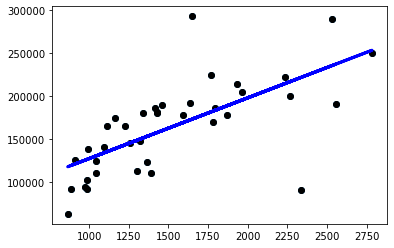

In [130]:
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train3 = train2.sample(frac=0.03)
X = train3[['GrLivArea']]
y = train3['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

model_slr = linear_model.LinearRegression()
model = model_slr.fit(X_train, y_train)
train_predictions = model_slr.predict(X_train)
test_predictions = model_slr.predict(X_test)

plt.scatter(X_train, y_train,  color='black')
plt.plot(X_train, train_predictions, color='blue', linewidth=3)

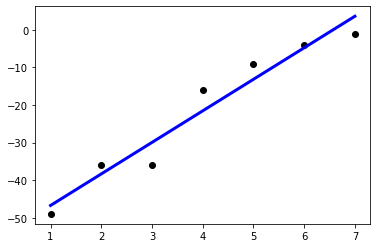

In [131]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)

model = linear_model.LinearRegression()
model = model.fit(X, y)

train_predictions = model.predict(X)

plt.scatter(X, y,  color='black')
plt.plot(X, train_predictions, color='blue', linewidth=3)



[[ 7 49]
 [ 6 36]
 [ 5 25]
 [ 4 16]
 [ 3  9]
 [ 2  4]
 [ 1  1]]
[13.25 -0.61]
-62.4285714285714


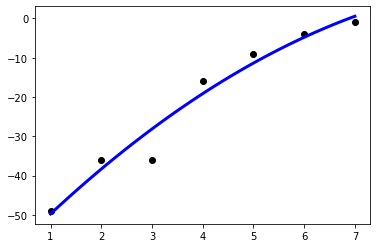

In [132]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2]
model = linear_model.LinearRegression()
model = model.fit(X, y)
X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(X)
print(model.coef_)
print(model.intercept_)

[3.93 7.14 6.47 -0.50 -6.86 4.27 -1.06 0.12 -0.01]
-62.50258416955434


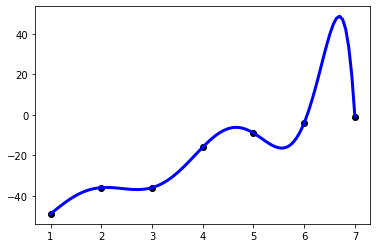

In [133]:
# Add poynomial features
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.LinearRegression()
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### Ridge Regression

[0.17 0.32 0.34 0.12 -0.16 0.11 -0.03 0.00 -0.00]
-46.628314514269405


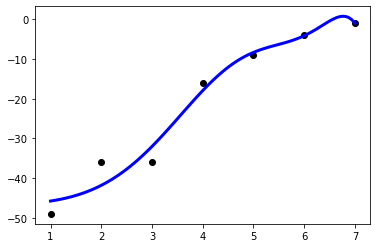

In [136]:
from sklearn.linear_model import Ridge
X = np.array([7,6,5,4,3,2,1])
y = np.array([1,2,3,4,6,6,7])
y = -y**2
X = X.reshape(-1,1)
X = np.c_[X,X**2,X**3,X**4,X**5,X**6,X**7,X**8,X**9]
# Add more polynomial features and plot the result
model = linear_model.Ridge(alpha=10)
# play with the value of alpha and see its effect.
model = model.fit(X, y)

X2 = np.linspace(1,7,100)
X2 = X2.reshape(-1,1)
X2 = np.c_[X2,X2**2,X2**3,X2**4,X2**5,X2**6,X2**7,X2**8,X2**9]
train_predictions = model.predict(X2)

plt.scatter(X[:,0], y,  color='black')
plt.plot(X2[:,0], train_predictions, color='blue', linewidth=3)
print(model.coef_)
print(model.intercept_)

### PolynomialFeatures method in Python

In [137]:
from sklearn.preprocessing import PolynomialFeatures
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.fillna(X.mean())
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X = X.fillna(X.mean()) #is this ok?
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())

    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, y_train)
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, test_predictions))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))
print ("Intercept:", model.intercept_)
print(X);

Test MAE: 37470.817089653654
Test Kaggle-Score: 0.27888855796081646
Test MAPE: 23.05943106038593
Intercept: -2993.850445096148
[[1710.00 3.00 2924100.00 5130.00 9.00]
 [1262.00 3.00 1592644.00 3786.00 9.00]
 [1786.00 3.00 3189796.00 5358.00 9.00]
 ...
 [2340.00 4.00 5475600.00 9360.00 16.00]
 [1078.00 2.00 1162084.00 2156.00 4.00]
 [1256.00 3.00 1577536.00 3768.00 9.00]]


### Batch Gradient Descent Implementation

In [138]:
def cost(X,y,w,b):
    return np.sum(np.abs((np.dot(X,w) + b) - y))/X.shape[0]

In [139]:
X = train.loc[:,['GrLivArea','BedroomAbvGr']]
y = train.loc[:,'SalePrice']
X = X.to_numpy()
y = y.to_numpy()
scaler = MinMaxScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [140]:
y.shape
y = y.reshape(y.size, 1)
y.shape

(1460, 1)

In [144]:
import copy

n_features = 2
learning_rate = 0.1
n_iter=2000
m = X.shape[0]
w = np.random.rand(n_features,1)
b = np.random.rand()
y = y.reshape(y.size, 1)
cost_array = []

for iter in range(n_iter):
    c = cost(X,y,w,b)
    cost_array.append(c) 
    print(c)
    w_back = copy.deepcopy(w)
    for j in range(n_features): 
        dw = 0;
        db = 0;
        for i in range(m):
            dw=dw+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))*X[i,j]
        w[j] = w_back[j] + learning_rate * dw/m;
        
    for i in range(m):
        db=db+(y[i] - (np.dot(X[i].reshape([1,2]),w_back) + b))
    b = b + learning_rate * db/m;

180920.48483971262
159436.65671814294
140494.05345395664
123888.59481685133
109410.78966173701
96886.49787682887
86422.54181283485
77823.99529023422
70837.40576419568
65430.42021783537
61389.35033184888
58543.10696204086
56524.24644323996
55100.92302414656
54143.63831100176
53487.67339202557
53074.46417111747
52858.308131654805
52774.726843953795
52758.379092638235
52790.57713068018
52852.630132692335
52926.40275294401
53005.12214870116
53087.79060210569
53180.83200604651
53274.47948631935
53364.08263090394
53447.55591656795
53525.14570393664
53596.40711032108
53660.21030293958
53716.56652264036
53766.00466105693
53808.74989575457
53845.635761776386
53876.98149221144
53902.871559610256
53923.39931851985
53939.54479428576
53951.33481803149
53959.22516197225
53963.701791789696
53964.86901806759
53963.120115399564
53958.894960891805
53952.61291052505
53944.31030393058
53934.280221940375
53922.76850141968
53909.904357767715
53895.81639518771
53880.78977383922
53864.790113150615
53847.93490

KeyboardInterrupt: 

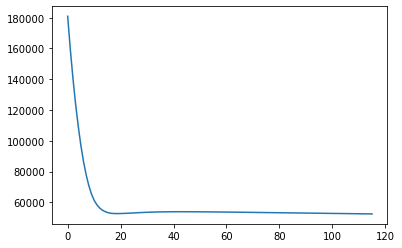

In [145]:
plt.plot(cost_array)